In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### Load Cleaned Dataset

In [6]:
df = pd.read_csv("cleaned_data.csv")
print("Loaded data shape:", df.shape)
df.head()

Loaded data shape: (3537, 24)


,Price,RAM_Expandable,RAM,RAM_TYPE(DDR),Display_type,Processor_Tier,Processor_Speed(Ghz),Display_Tier,GPU_Tier,SSD(GB),...,Brand_HP,Brand_Lenovo,Brand_MSI,Brand_Other,Brand_Samsung,Processor_Apple,Processor_Intel,GPU_Apple,GPU_Intel,GPU_NVIDIA
0,127011.5,1,8,4,0,1.0,4.0,2,1,512,...,False,True,False,False,False,False,False,False,False,False
1,274750.0,1,16,5,0,1.0,3.5,2,3,512,...,False,False,False,False,False,False,True,False,False,True
2,194215.0,1,8,4,0,1.0,4.0,2,2,512,...,True,False,False,False,False,False,True,False,True,False
3,76965.0,0,8,4,0,0.0,1.5,2,1,512,...,False,False,False,True,False,False,True,False,True,False
4,122465.0,1,16,4,0,1.0,2.5,1,2,512,...,False,False,False,False,False,False,True,False,True,False


### Split features and target

In [7]:
X = df.drop("Price", axis=1)
y = df["Price"]

### Train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Apply scaling only to numeric features

In [9]:
scaler = StandardScaler()

In [10]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

### Fit scaler on training data, transform both train and test sets

In [16]:
# Select numeric columns only (int or float) for scaling
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Fill NaNs in numeric columns with median (train set)
X_train_scaled[numeric_cols] = X_train_scaled[numeric_cols].fillna(X_train_scaled[numeric_cols].median())
X_test_scaled[numeric_cols] = X_test_scaled[numeric_cols].fillna(X_train_scaled[numeric_cols].median())



### Train the Linear Regression model

In [17]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Predict on test set

In [18]:
y_pred = model.predict(X_test_scaled)

### Evaluate model

In [19]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [21]:
print("Model Evaluation Metrics")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation Metrics
MAE (Mean Absolute Error): 36394.14
RMSE (Root Mean Squared Error): 49679.78
R² Score: 0.7460


### Visualization: Actual vs Predicted

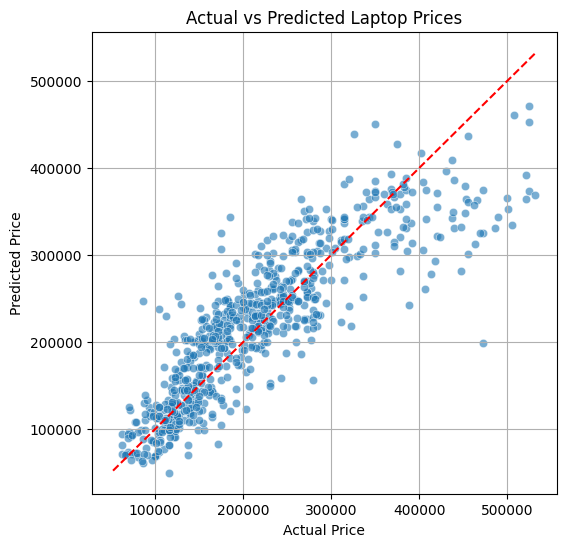

In [22]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Laptop Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()